# Mixup

The [mixup paper](https://arxiv.org/abs/1710.09412) is for deep learning. Would it work with general linear models?

In [1]:
library(ggplot2)

Can we relearn the relationship

In [2]:
df <- data.frame(
    x = seq(1, 100)
)

df$y1 = df$x * 5
df$y2 = df$x / 8 + 8

# df$y1 <- scale(df$y1)
# df$y2 <- scale(df$y2)

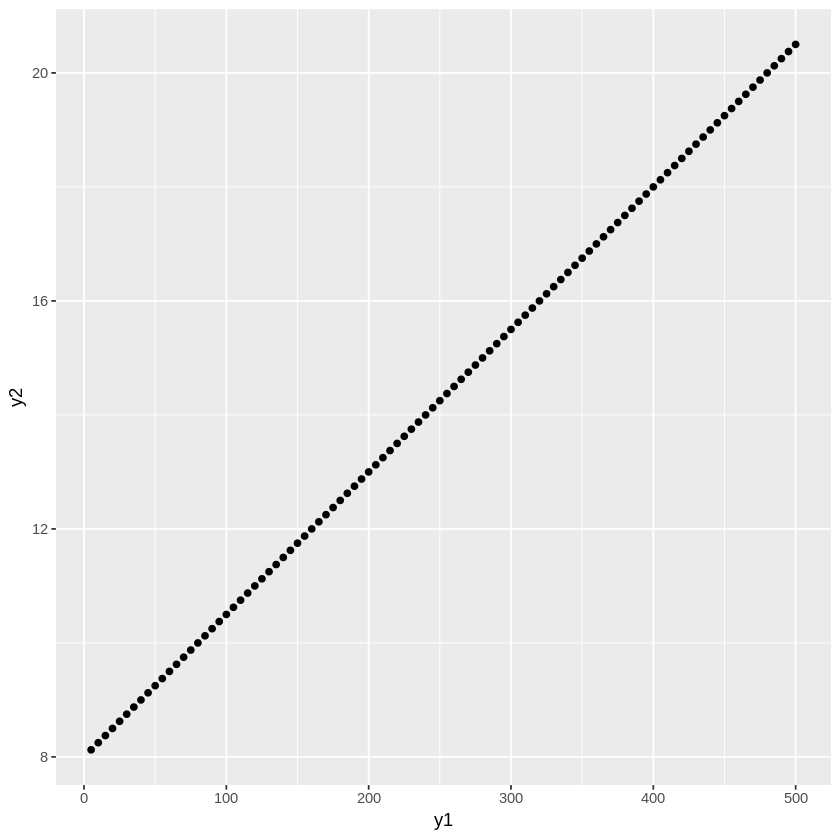

In [3]:
ggplot(df) + geom_point(aes(y1, y2))

In [16]:
x.prop <- runif(length(df$y1) * length(df$y2))

In [17]:
head(x.prop)

[1] 0.3076131 0.6289939 0.5924903 0.5399049 0.2112771 0.6918940

## Exhaustive combination

In [18]:
z <- outer(df$y1, df$y2, FUN = "+")

In [19]:
length(c(z))

[1] 10000

In [20]:
bigdf <- data.frame(
    x1 = rep(1:100, times=length(df$y2)),
    x2 = rep(1:100, each=length(df$y1)),
    y1 = rep(df$y1, times = length(df$y2)),
    y2 = rep(df$y2, each = length(df$y1)),
    combo = c(z),
    portion = x.prop
)

bigdf$portion = bigdf$portion + 0.5 - mean(bigdf$portion)

bigdf$othercombo <- 2 * (bigdf$portion * bigdf$y1 + (1-bigdf$portion) * bigdf$y2)

In [21]:
head(bigdf)
tail(bigdf)

x1,x2,y1,y2,combo,portion,othercombo
1,1,5,8.125,13.125,0.3042578,14.34839
2,1,10,8.125,18.125,0.6256385,18.59614
3,1,15,8.125,23.125,0.5891350,24.35061
4,1,20,8.125,28.125,0.5365495,28.99305
5,1,25,8.125,33.125,0.2079218,23.26736
6,1,30,8.125,38.125,0.6885387,46.37357


,x1,x2,y1,y2,combo,portion,othercombo
9995,95,100,475,20.5,495.5,0.79248891,761.37242
9996,96,100,480,20.5,500.5,0.36683207,378.11868
9997,97,100,485,20.5,505.5,0.02104674,60.55242
9998,98,100,490,20.5,510.5,0.58656122,591.78098
9999,99,100,495,20.5,515.5,0.23627098,265.22116
10000,100,100,500,20.5,520.5,0.41051109,434.68013


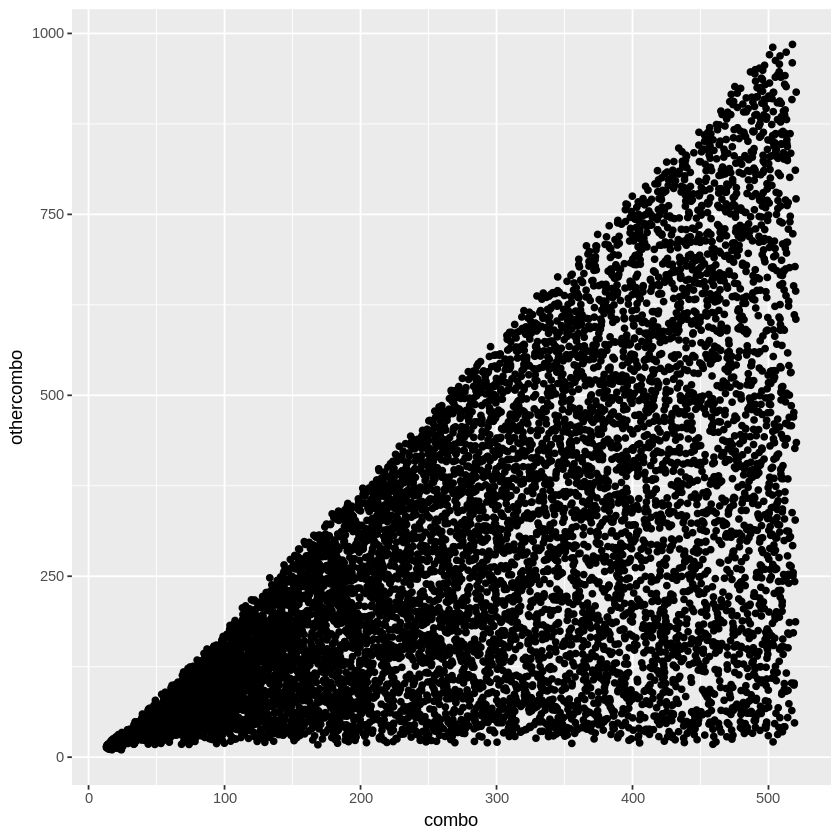

In [22]:
ggplot(subset(bigdf)) + geom_point(aes(combo, othercombo))

In [23]:
head(bigdf)
tail(bigdf)

x1,x2,y1,y2,combo,portion,othercombo
1,1,5,8.125,13.125,0.3042578,14.34839
2,1,10,8.125,18.125,0.6256385,18.59614
3,1,15,8.125,23.125,0.5891350,24.35061
4,1,20,8.125,28.125,0.5365495,28.99305
5,1,25,8.125,33.125,0.2079218,23.26736
6,1,30,8.125,38.125,0.6885387,46.37357


,x1,x2,y1,y2,combo,portion,othercombo
9995,95,100,475,20.5,495.5,0.79248891,761.37242
9996,96,100,480,20.5,500.5,0.36683207,378.11868
9997,97,100,485,20.5,505.5,0.02104674,60.55242
9998,98,100,490,20.5,510.5,0.58656122,591.78098
9999,99,100,495,20.5,515.5,0.23627098,265.22116
10000,100,100,500,20.5,520.5,0.41051109,434.68013


## Can we jointly learn the two models using their linear combination?

In [24]:
summary(gmod <- glm(combo ~ x1 + x2, data=bigdf))


Call:
glm(formula = combo ~ x1 + x2, data = bigdf)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.842e-12  -1.762e-12  -5.684e-13   5.755e-13   1.737e-12  

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 8.000e+00  3.908e-14 2.047e+14   <2e-16 ***
x1          5.000e+00  5.073e-16 9.855e+15   <2e-16 ***
x2          1.250e-01  5.073e-16 2.464e+14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.144727e-24)

    Null deviance: 2.0844e+08  on 9999  degrees of freedom
Residual deviance: 2.1441e-20  on 9997  degrees of freedom
AIC: -516607

Number of Fisher Scoring iterations: 1


### Error (of ?seemingly arbitrary size?) if proportion is not exactly 0.5 -- may be a sample size issue

In [26]:
summary(gmod <- glm(othercombo ~ x1 + x2, data=bigdf))


Call:
glm(formula = othercombo ~ x1 + x2, data = bigdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-479.28   -87.02    -0.21    89.03   480.73  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.41226    4.34781   2.165   0.0304 *  
x1           4.95525    0.05644  87.793   <2e-16 ***
x2           0.12536    0.05644   2.221   0.0264 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 26545.29)

    Null deviance: 470104856  on 9999  degrees of freedom
Residual deviance: 265373249  on 9997  degrees of freedom
AIC: 130250

Number of Fisher Scoring iterations: 2


### This is the same result as we would learn for the individual models

In [27]:
summary(glm(y1 ~ x1, data=bigdf))


Call:
glm(formula = y1 ~ x1, data = bigdf)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.274e-12  -1.151e-12  -4.263e-14   1.091e-12   2.211e-12  

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -2.256e-12  2.620e-14 -8.609e+01   <2e-16 ***
x1           5.000e+00  4.504e-16  1.110e+16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.690369e-24)

    Null deviance: 2.0831e+08  on 9999  degrees of freedom
Residual deviance: 1.6900e-20  on 9998  degrees of freedom
AIC: -518988

Number of Fisher Scoring iterations: 1


In [28]:
summary(glm(y2 ~ x2, data=bigdf))


Call:
glm(formula = y2 ~ x2, data = bigdf)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.208e-13  -1.004e-13  -8.171e-14  -6.040e-14  -3.908e-14  

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 8.000e+00  1.705e-15 4.691e+15   <2e-16 ***
x2          1.250e-01  2.932e-17 4.263e+15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 7.162933e-27)

    Null deviance: 1.3020e+05  on 9999  degrees of freedom
Residual deviance: 7.1615e-23  on 9998  degrees of freedom
AIC: -573626

Number of Fisher Scoring iterations: 1
